In [1]:
import numpy as np
from time import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def next_permutation(seq, pred=cmp): # RUTINA PARA GENERAR LAS PERMUTACIONES CON REPETICION
    """Like C++ std::next_permutation() but implemented as
    generator. Yields copies of seq."""
    def reverse(seq, start, end):
        # seq = seq[:start] + reversed(seq[start:end]) + \
        #       seq[end:]
        end -= 1
        if end <= start:
            return
        while True:
            seq[start], seq[end] = seq[end], seq[start]
            if start == end or start+1 == end:
                return
            start += 1
            end -= 1
    if not seq:
        raise StopIteration
    try:
        seq[0]
    except TypeError:
        raise TypeError("seq must allow random access.")
    first = 0
    last = len(seq)
    seq = seq[:]
    # Yield input sequence as the STL version is often
    # used inside do {} while.
    yield seq[:]
    if last == 1:
        raise StopIteration
    while True:
        next = last - 1
        while True:
            # Step 1.
            next1 = next
            next -= 1
            if pred(seq[next], seq[next1]) < 0:
                # Step 2.
                mid = last - 1
                while not (pred(seq[next], seq[mid]) < 0):
                    mid -= 1
                seq[next], seq[mid] = seq[mid], seq[next]
                # Step 3.
                reverse(seq, next1, last)
                # Change to yield references to get rid of
                # (at worst) |seq|! copy operations.
                yield seq[:]
                break
            if next == first:
                raise StopIteration
    raise StopIteration

In [3]:
# GENERADOR DE MICROESTADOS RED N=L*L


def Energias(L): # ESTA FUNCION SOLO DEPENDE DEL TAMANO DEL LADO DE LA RED
    Energias=[]
    N=L*L #NUMERO DE SPINES EN RED
    for i in range(0,N+1): # CREA LAS PERMUTACIONES CON REPETICION DE ESTADOS ARRIBA Y ABAJO
        print str(i)+" Espines abajo"
        microestados=list(next_permutation([-1]*i+[1]*(N-i)))
        c=0
        for i in microestados:
            microestados[c]=np.reshape(i,(L,L))
            c+=1
        for micro in microestados:
            Energia=0
            for i in range(L):
                for j in range(L):
                    arriba=i-1
                    abajo=i+1
                    der=j+1
                    izq=j-1
                    if arriba<0:
                        arriba=-1
                    if abajo>L-1:
                        abajo=0
                    if der>L-1:
                        der=0
                    if izq<0:
                        izq=-1
                    Energia=Energia-micro[i][j]*micro[arriba][j]-micro[i][j]*micro[abajo][j]-micro[i][j]*micro[i][der]-micro[i][j]*micro[i][izq]
            Energia=Energia/2 # LA FUNCION ANTERIOR CUENTA DOS VECES CADA INTERACCION
            Energias.append(Energia)
    return Energias

# ESTA FUNCION CALCULA LA DENSIDAD DE ESTADOS
                        
def DensidadEstado(Energias):
    EnergiasSR=[]
    Omega=[]
    for i in Energias: # CUENTA EL NUMERO DE DIFERENTES ENERGIAS
        if i not in EnergiasSR:
            EnergiasSR.append(i)
    for j in EnergiasSR: # CUENTA EL NUMERO DE VECES QUE SE REPITE CADA ENERGIA PARA CALCULAR OMEGA
        c=0
        for k in Energias:
            if k==j:
                c+=1
        Omega.append(c)
    Densidad=[]
    for m in range(len(EnergiasSR)):
        Densidad.append([EnergiasSR[m],Omega[m]])
    return Densidad


In [15]:
# MALLA 2*2

t0=time()
E22=Energias(2)
Resultado22=DensidadEstado(E22)
t1=time()

f = open('Energias22.txt','w')
f.write(str(Resultado22))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo


In [16]:
# MALLA 3*3

t0=time()
E33=Energias(3)
Resultado33=DensidadEstado(E33)
t1=time()

f = open('Energias33.txt','w')
f.write(str(Resultado33))
f.write("\n"+str(t1-t0))
f.close()


0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo


In [17]:
# MALLA 4*4

t0=time()
E44=Energias(4)
Resultado44=DensidadEstado(E44)
t1=time()

f = open('Energias44.txt','w')
f.write(str(Resultado44))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo
10 Espines abajo
11 Espines abajo
12 Espines abajo
13 Espines abajo
14 Espines abajo
15 Espines abajo
16 Espines abajo


In [19]:
archivo=open("Energias33.txt","r")
datos=archivo.readlines()
densidad=datos[0]

In [20]:
densidad

'[[-18, 2], [-10, 18], [-6, 48], [-2, 198], [2, 144], [6, 102]]\n'

[[-18, 2], [-10, 18], [-6, 48], [-2, 198], [2, 144], [6, 102]]

In [34]:
Resultado3
def Zeta(T,Densidad):

    zet=0
    for j in Densidad:
        zet+=j[1]*np.exp(-1.0*j[0]/T)
    return zet

def prome_ene(T,Densidad):
    e=0
    for j in Densidad:
        e+=j[0]*j[1]*np.exp(-1.0*j[0]/i)
    return e/Zeta(T,Densidad)
def prome_ene2(T,Densidad):
    e2=0
    for j in Densidad:
        e2+=j[0]*j[0]*j[1]*np.exp(-1.0*j[0]/i)
    return e2/Zeta(T,Densidad)

In [53]:
#2*2
T=np.linspace(0.1,10,200)
e22=np.array([prome_ene2(i,Resultado22) for i in T ])
e2=np.array([prome_ene(i,Resultado22) for i in T ])
cv2=(e22-e2*e2)/T/T
#3*3
T=np.linspace(0.1,10,200)
e23=np.array([prome_ene2(i,Resultado33) for i in T ])
e3=np.array([prome_ene(i,Resultado33) for i in T ])
cv3=(e23-e3*e3)/T/T
#4*4
T=np.linspace(0.1,10,200)
e24=np.array([prome_ene2(i,Resultado44) for i in T ])
e4=np.array([prome_ene(i,Resultado44) for i in T ])
cv4=(e24-e4*e4)/T/T

(0, 7)

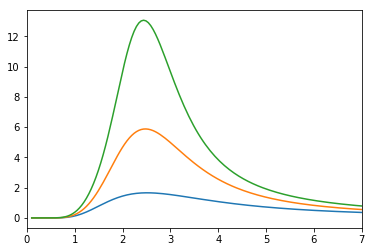

In [56]:
plt.plot(T,cv2)
plt.plot(T,cv3)
plt.plot(T,cv4)
xlim(0,7)